In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins

case = pd.read_csv('Case.csv')
p_info = pd.read_csv('PatientInfo.csv')
t_age = pd.read_csv('TimeAge.csv')
t_gender = pd.read_csv('TimeGender.csv')

In [ ]:
p_info.head()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


In [ ]:
t_age.head()

,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1


In [ ]:
t_gender.head()

,date,time,sex,confirmed,deceased
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9
2,2020-03-03,0,male,1810,16
3,2020-03-03,0,female,3002,12
4,2020-03-04,0,male,1996,20


In [ ]:
case.head()
#group: True means domestic group infection and False means overseas infection

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384
2,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387
3,1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.546061,126.874209
4,1000005,Seoul,Dobong-gu,True,Day Care Center,43,37.679422,127.044374


**Visualization of daily and cumulative confirmed Covid-19 cases**    (Jan-June 2020)



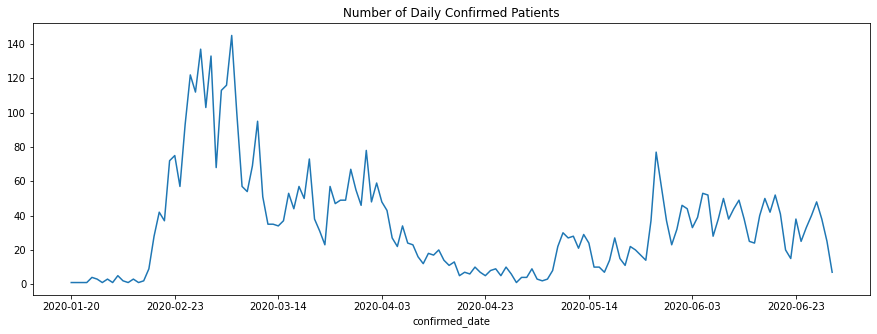

In [ ]:
#daily confirmed Covid-19 cases
daily_count = p_info.groupby(['confirmed_date'])['patient_id'].count()
plt.rcParams['figure.figsize'] = (15, 5)
plt.title('Number of Daily Confirmed Patients')
daily_count.plot()

Text(0.5, 1.0, 'Accumulated Number of Daily Confirmed Patients')

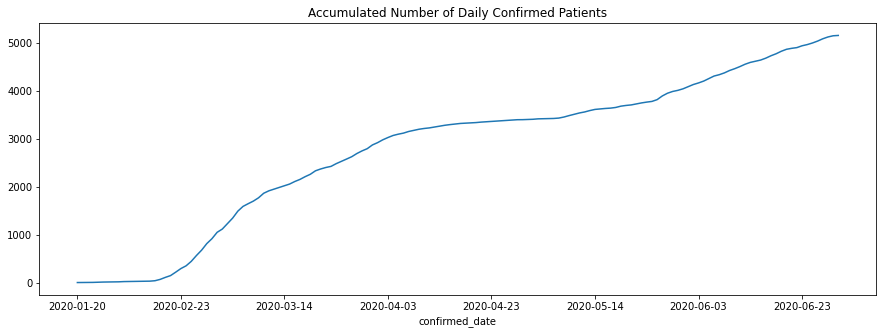

In [ ]:
#accumulated confirmed Covid-19 cases
accumulated_count = daily_count.cumsum()
accumulated_count.plot()
plt.title('Accumulated Number of Daily Confirmed Patients')

**Confirmed cases per province in Korea**

In [ ]:
#Confirmed cases in Daegu province
case[case['province']=='Daegu']

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
48,1200001,Daegu,Nam-gu,True,Shincheonji Church,4511,35.84008,128.5667
49,1200002,Daegu,Dalseong-gun,True,Second Mi-Ju Hospital,196,35.857375,128.466651
50,1200003,Daegu,Seo-gu,True,Hansarang Convalescent Hospital,124,35.885592,128.556649
51,1200004,Daegu,Dalseong-gun,True,Daesil Convalescent Hospital,101,35.857393,128.466653
52,1200005,Daegu,Dong-gu,True,Fatima Hospital,39,35.88395,128.624059
53,1200006,Daegu,from other city,True,Itaewon Clubs,2,-,-
54,1200007,Daegu,from other city,True,Cheongdo Daenam Hospital,2,-,-
55,1200008,Daegu,-,False,overseas inflow,41,-,-
56,1200009,Daegu,-,False,contact with patient,917,-,-
57,1200010,Daegu,-,False,etc,747,-,-


[Text(0, 0.5, 'City'),
 Text(0.5, 0, 'Confirmed'),
 Text(0.5, 1.0, 'Cases in Daegu')]

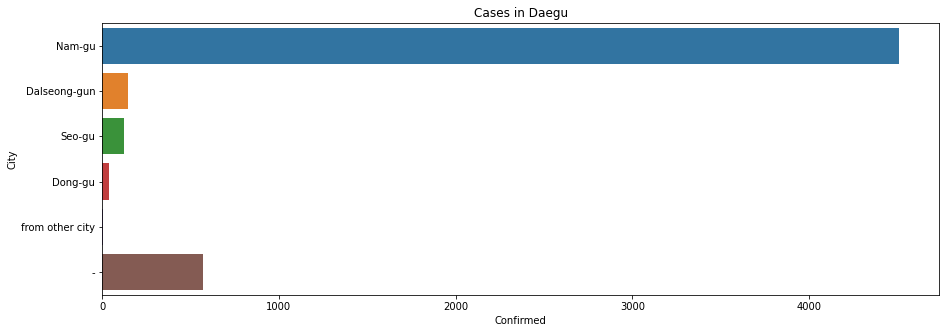

In [ ]:
sns.barplot(x='confirmed', y='city', data=case[case['province']=='Daegu'], ci=None).set(xlabel='Confirmed', ylabel='City', title='Cases in Daegu')

[Text(0, 0.5, 'District'),
 Text(0.5, 0, 'Confirmed'),
 Text(0.5, 1.0, 'Cases in Seoul')]

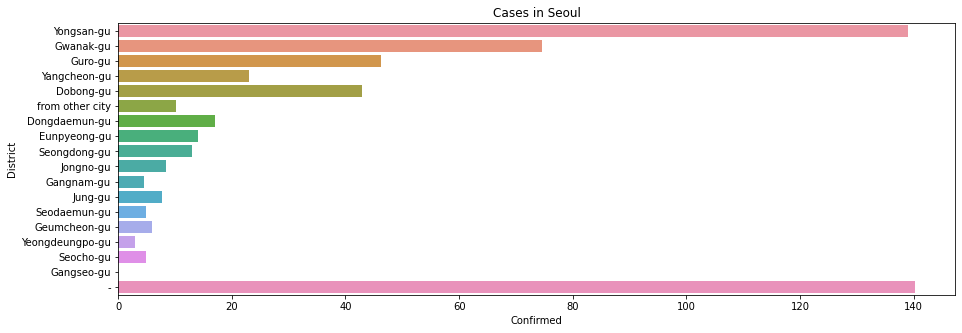

In [ ]:
##Confirmed cases in Seoul province
case[case['province']=='Seoul']
sns.barplot(x='confirmed', y='city', data=case[case['province']=='Seoul'], ci=None).set(xlabel='Confirmed', ylabel='District', title='Cases in Seoul')

**Covid-19 confirmed cases by gender and age**

In [ ]:
#Confirmed cases by gender on June 30 2020
t_gender[t_gender.date=='2020-06-30'].confirmed

240    5495
241    7305
Name: confirmed, dtype: int64

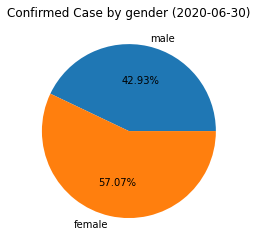

In [ ]:
# Make a pie chart
pie_labels = ['male', 'female']
pie_values = t_gender[t_gender.date=='2020-06-30'].confirmed.values
plt.pie(pie_values, labels=pie_labels, autopct='%.02f%%')
plt.title('Confirmed Case by gender (2020-06-30)')
plt.show()

In [ ]:
#Confirmed cases by age on June 30 2020
t_age[t_age.date=='2020-06-30']

,date,time,age,confirmed,deceased
1080,2020-06-30,0,0s,193,0
1081,2020-06-30,0,10s,708,0
1082,2020-06-30,0,20s,3362,0
1083,2020-06-30,0,30s,1496,2
1084,2020-06-30,0,40s,1681,3
1085,2020-06-30,0,50s,2286,15
1086,2020-06-30,0,60s,1668,41
1087,2020-06-30,0,70s,850,82
1088,2020-06-30,0,80s,556,139


In [ ]:
population_by_age = t_age[t_age.date=='2020-06-30']
population_by_age

,date,time,age,confirmed,deceased
1080,2020-06-30,0,0s,193,0
1081,2020-06-30,0,10s,708,0
1082,2020-06-30,0,20s,3362,0
1083,2020-06-30,0,30s,1496,2
1084,2020-06-30,0,40s,1681,3
1085,2020-06-30,0,50s,2286,15
1086,2020-06-30,0,60s,1668,41
1087,2020-06-30,0,70s,850,82
1088,2020-06-30,0,80s,556,139


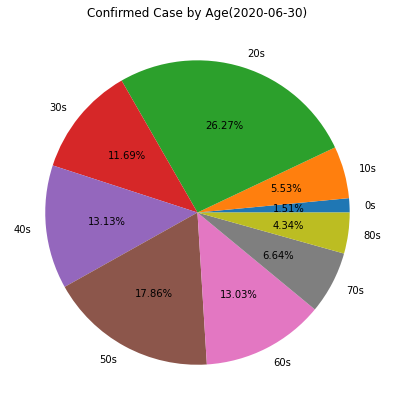

In [ ]:
# Make a pie chart
pie_labels = population_by_age.age.values
pie_values = t_age[t_age.date=='2020-06-30'].confirmed.values
plt.figure(figsize=(10, 7))
plt.pie(pie_values, labels=pie_labels, autopct='%.02f%%')
plt.title('Confirmed Case by Age(2020-06-30)')
plt.show()

**Number of domestic infections by district in map**

In [ ]:
# Group by domestic vs overseas infection
# See the confirmed for info not case_id
group_cases = case.pivot_table(index = ['group'], aggfunc = 'sum').reset_index()
group_cases

,group,case_id,confirmed
0,False,154300465,3544
1,True,313101077,7851


In [ ]:
# group: True means domestic group infection and False means overseas infection
group_cases = group_cases.replace({True: 'Local infection', False: 'overseas infection'})
group_cases

,group,case_id,confirmed
0,overseas infection,154300465,3544
1,Local infection,313101077,7851


In [ ]:
local_infection = case[case['group']==True]
local_infection

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384
2,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387
3,1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.546061,126.874209
4,1000005,Seoul,Dobong-gu,True,Day Care Center,43,37.679422,127.044374
...,...,...,...,...,...,...,...,...
163,6100006,Gyeongsangnam-do,Changnyeong-gun,True,Changnyeong Coin Karaoke,7,35.54127,128.5008
164,6100007,Gyeongsangnam-do,Yangsan-si,True,Soso Seowon,3,35.338811,129.017508
165,6100008,Gyeongsangnam-do,from other city,True,Itaewon Clubs,2,-,-
166,6100009,Gyeongsangnam-do,from other city,True,Onchun Church,2,-,-


In [ ]:
# Filter out the latitude with '-' which doesn't contain info
local_infection = local_infection[local_infection['latitude'] != '-']
local_infection = local_infection[local_infection['longitude'] != '-']
local_infection

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384
2,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387
3,1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.546061,126.874209
4,1000005,Seoul,Dobong-gu,True,Day Care Center,43,37.679422,127.044374
...,...,...,...,...,...,...,...,...
160,6100003,Gyeongsangnam-do,Jinju-si,True,Wings Tower,9,35.164845,128.126969
161,6100004,Gyeongsangnam-do,Geochang-gun,True,Geochang-gun Woongyang-myeon,8,35.805681,127.917805
162,6100005,Gyeongsangnam-do,Changwon-si,True,Hanmaeum Changwon Hospital,7,35.22115,128.6866
163,6100006,Gyeongsangnam-do,Changnyeong-gun,True,Changnyeong Coin Karaoke,7,35.54127,128.5008


In [ ]:
local_infection.isnull().sum()

 case_id          0
province          0
city              0
group             0
infection_case    0
confirmed         0
latitude          0
longitude         0
dtype: int64

In [ ]:
# Logitude,latitude of South Korea
latitude, longitude = 35.9078, 127.7669 
S_korea = folium.Map(location=[latitude, longitude], zoom_start = 8)
S_korea

In [ ]:
S_korea.add_child(plugins.HeatMap(zip(local_infection['latitude'].astype(float),
                                      local_infection['longitude'].astype(float),
                                      local_infection['confirmed'].astype(float)), radius=13))